In [3]:
import pandas as pd
import numpy as np

np.random.seed(0)

data = pd.DataFrame({
    'Student': ['Student'+str(i) for i in range(1, 26)],
    'Course': np.random.choice(['English 101', 'English 102', 'English 103'], 25),
    'Attendance': np.random.uniform(60, 100, 25),
    'Last Test Grade': np.random.uniform(60, 100, 25),   
    'ESL Student': np.random.choice([0, 1], 25),
    'Final Grade': np.random.uniform(60, 100, 25)
})

data.to_csv('data.csv', index=False)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('data.csv')

features = ['Attendance', 'Last Test Grade', 'ESL Student']
target = 'Final Grade'

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

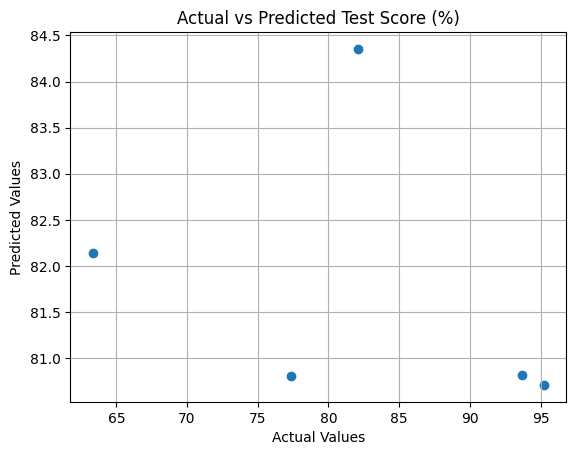

In [5]:
import matplotlib.pyplot as plt

# Predictions vs Actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Test Score (%)')
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

features = ['Attendance', 'Last Test Grade', 'Final Grade']
target = 'ESL Student'


X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = regressor.predict(X_test)

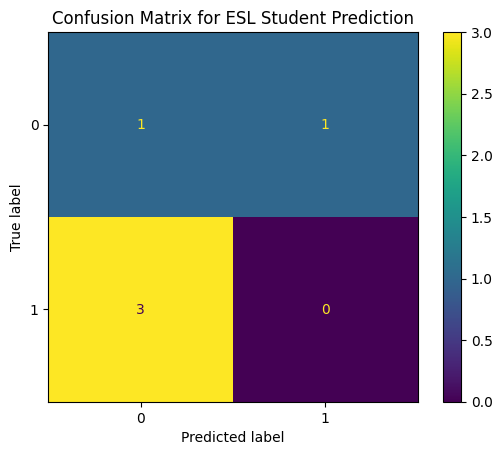

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the predictions
predictions = classifier.predict(X_test)

# compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix for ESL Student Prediction')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Course'])

target = 'ESL Student'
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

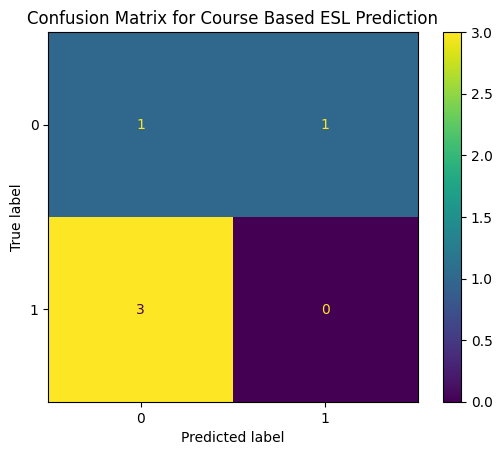

In [11]:
# get the predictions
predictions = classifier.predict(X_test)

# compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix for Course Based ESL Prediction')
plt.show()

In [12]:
from sklearn.cluster import KMeans

features = ['Attendance', 'Last Test Grade', 'Final Grade']

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[features])

predictions = kmeans.predict(data[features])


d:\AuriMain\Documents\Code\Learn\UPY Generative AI Course\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


d:\AuriMain\Documents\Code\Learn\UPY Generative AI Course\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


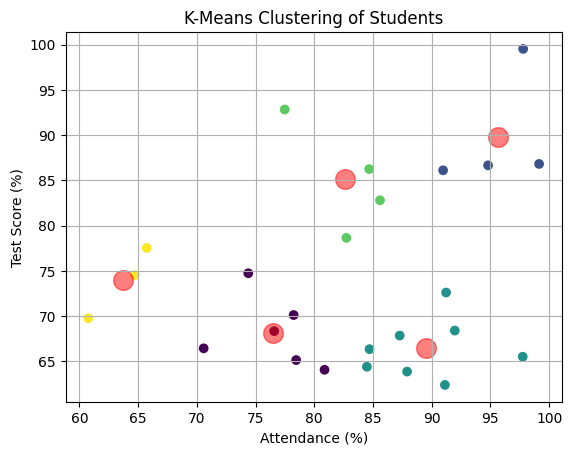

In [17]:
features = ['Attendance', 'Last Test Grade']
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data[features])

predictions = kmeans.predict(data[features])

plt.scatter(data['Attendance'], data['Last Test Grade'], c=predictions, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Attendance (%)')
plt.ylabel('Test Score (%)')
plt.title('K-Means Clustering of Students')
plt.grid(True)
plt.show()
